# Introduction to SciPy and NumPy

## Part 1. Libraries

For this excercise you'll need three libraries:

- `numpy` - main library for working with matrices;
- `scipy`, specifically `scipy.linalg` module, contains a lot of functions from linear algebra;
- `matplotlib` - plotting library

In [3]:
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

**The main objects and operations of linear algebra in NumPy and SciPy:**

The main object you'll work with is a matrix. In `numpy` library they are reprecented by `numpy.ndarray` class. A matrix can be created from an array.

In [4]:
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # pair (number of rows, number of columns)

[[1 2 3]
 [4 5 6]]
(2, 3)


There are many other matrix constructors. For example, matrix of ones of size $n\times n$ is created using a `numpy.eye(n)` function. All the constructors can be found [here](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Often access to submatrices of a matrix is needed, and there are many convenient ways to do it in numpy (it's called slicing):
- element number `(i,j)`: `A[i,j]`
- ith row of a matrix: `A[i,:]`
- jth column of a matrix: `A[:,j]`

**Attention!** Both functions `A[i,:]` and `A[:,j]` return a one-dimensional vector, not a row or column. If you want a row-vector or a column-vector, use this syntaxis: `A[i:i+1,:]`, и `A[:,j:j+1]`
- rows from zero to ith: `A[:i+1,:]`
- columns from jth to last: `A[:,j:]`
- rows from ith to kth: `A[i:k,:]`

*Matrix multiplication* is done using `np.dot()`. There are two ways to write it: `A.dot(B)` и `np.dot(A, B)`.

Usual arithmetic signs (`+`, `-`, `*`) are reserved for element-wise operations. For example, `A * B` &mdash; is a matrix elements of which are products $A_{ij}B_{ij}$.

To get the *transpose* of matrix `A`, write `A.T`. 

Sometimes *random matrices* might be needed. It can be done using [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html) package. `np.random.rand(m,n)` generates a $m\times n$ matrix, elements of which are independently selected out of intervel `[0;1)`.

In `scipy.linalg` package there are many methods for *solving systems of linear equations*. One of the simplest is `scipy.linalg.solve`. `scipy.linalg.solve(A, B)` returns the solution of $AX = B$ (or an error), where $B$ can be either a vector or a matrix.

Inverse of matrix $A$ can be found using `sla.inv(A)`.

**The task**

- create zero $3\times4$; matrix $Z$

- create diagonal $5\times5$ matrix with diagonal elements 1, 2, 3, 4 и 5;

- find its trace using library functions;

- find its inverse;

- generate random $4\times5$ matrix $X$;

- find the determinant of submatrix of $X$, located at the intersection of 2 and 3 rows and 1 and 2 columns where row and column numeration starts with one;

- find the product $X^TX$.


An example: identity matrix

In [2]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [13]:
Z = np.zeros((3, 4))
Z

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [8]:
a = np.zeros((5, 5))
np.fill_diagonal(a, [1, 2, 3, 4, 5])
a

array([[1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 5.]])

In [9]:
np.trace(a)

15.0

In [10]:
sla.inv(a)

array([[ 1.        ,  0.        ,  0.        ,  0.        , -0.        ],
       [ 0.        ,  0.5       ,  0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

In [15]:
X = np.random.rand(4, 5)
X

array([[0.78447896, 0.89097437, 0.8030444 , 0.39080313, 0.94549664],
       [0.28136607, 0.79296265, 0.14260756, 0.31346628, 0.18247018],
       [0.54903616, 0.44590578, 0.47894847, 0.25178227, 0.10496422],
       [0.64496237, 0.4107619 , 0.86008688, 0.32623764, 0.27051247]])

In [24]:
sla.det(X[[1,2],:][:,[0,1]])

-0.309902417112009

In [17]:
np.dot(X.T, X)

array([[1.41199127, 1.43180779, 1.48778007, 0.74342418, 1.02516266],
       [1.43180779, 1.7901824 , 1.39543126, 0.84303979, 1.14502569],
       [1.48778007, 1.39543126, 1.6343583 , 0.75971838, 1.06823409],
       [0.74342418, 0.84303979, 0.75971838, 0.42081351, 0.54138078],
       [1.02516266, 1.14502569, 1.06823409, 0.54138078, 1.01145376]])

## Part 2. Time

In Python it is better to use library functions rather than write your own. Library functions are based on modern algorithms and are usually written in more efficient languages, e.g. C++ or Fortran so it's not easy to write something better.

Write a function called `my_det` that computes the determinant of a matrix using elementary row operations. The function should throw `ValueError` if a matrix is not square.

In [93]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like
    
    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    
    # Your code here
    if len(X) != len(X[0]):
        raise ValueError('ValueError')
    n = len(X)
    c = X.copy()
    m = 1
    for i in range(n):
        ind = i
        while c[i][i] == 0 and ind < n - 1:
            ind += 1
            if c[ind][i] != 0:
                T = c.copy()
                c[i] = T[ind].copy()
                c[ind] = T[i].copy()
                m *= (-1)
        if c[i][i] == 0:
            pass
        else:
            for j in range(i + 1, n):
                coeff = c[j][i] / c[i][i]
                for k in range(n):
                    c[j][k] = c[j][k] - coeff * c[i][k]
    det = m
    for i in range(n):
        det *= c[i][i]
    return det

Simple checkup:

In [94]:
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1


In case we just got lucky with this matrix, it makes sense to write better tests. We'll generate several random $8\times8$ matrices using `numpy.random.rand` and compare our answers to the real determinant found by `scipy.linalg.det`.

In [95]:
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

If you didn't get `FAILED`, your function works correctly.

Let's compare the speed of your function to the speed of `scipy.linalg.det`. There are several ways to measure time in Python; we'll use `%timeit` decorator. Written before a function, it runs this function several times, randomly picks three runs and returns the duration of the fastest out of these three. `-o` modifier written between the decorator and the function allows to write the result generated by the decorator into a variable.

The next block of code will take rather long.

10.2 µs ± 388 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
456 µs ± 5.38 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
67.2 µs ± 686 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
417 ms ± 2.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.45 ms ± 319 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<ipython-input-93-5608bf24ec07>:37: RuntimeWarning: overflow encountered in double_scalars
  det *= c[i][i]


7min 30s ± 9.48 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


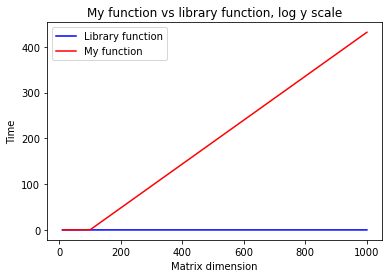

In [96]:
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Draw the graph in *logarithmic scale* on y-axis:

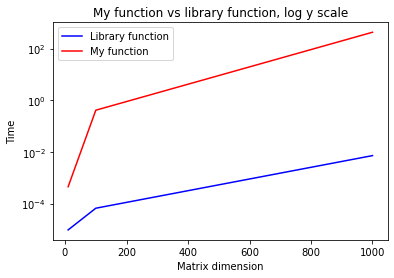

In [97]:
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Library function works *a lot* faster.

## Part 3. Precision

Floating point arithmetics is done with limited precision. 

Multiply two pairs of matrices:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
and
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
In multiplying the second pair float point numbers will be used.

In [106]:
# Your code here
inta = np.array([[1, 0], [pow(10, 20), 1]])
intb = np.array([[pow(10, -20), 1], [0, 1 - pow(10, 20)]])
floata = np.array([[1., 0.], [pow(10., 20), 1.]])
floatb = np.array([[pow(10., -20), 1.], [0., 1. - pow(10., 20)]])
print(np.dot(inta, intb))
print(np.dot(floata, floatb))

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


The correct answer is the first one.

Not everything is great with integers either. Without using library functions, write a function that generates *Pascal matrix* of size $n$ - the matrix $P$, where $P_{ij} = C_{i+j}^i$.

In [110]:
def my_pascal(dim):

    P = np.zeros((dim, dim))
    
    # Your code here
    n = dim * 2 + 1
    coeff = np.zeros((n, n))
    for i in range(n):
        for j in range(min(i + 1, n)):
            if j == 0 or j == i:
                coeff[i][j] = 1
            else:
                coeff[i][j] = coeff[i - 1][j - 1] + coeff[i - 1][j]
    for i in range(dim):
        for j in range(dim):
            P[i][j] = coeff[i+j][i]
    return P

The determinant of *Pascal matrix* equals one.

$
\left(\begin{smallmatrix}
1 & 1 & 1 & 1 & \cdots \\
1 & 2 & 3 & 4 & \cdots \\
1 & 3 & 6 & 10 & \cdots \\
1 & 4 & 10 & 20 & \cdots \\
\cdots
\end{smallmatrix}\right)
=
\left(\begin{smallmatrix}
1 & 0 & 0 & 0 & \cdots \\
1 & 1 & 0 & 0 & \cdots \\
1 & 2 & 1 & 0 & \cdots \\
1 & 3 & 3 & 1 & \cdots \\
\cdots
\end{smallmatrix}\right)
\cdot
\left(\begin{smallmatrix}
1 & 1 & 1 & 1 & \cdots \\
0 & 1 & 2 & 3 & \cdots \\
0 & 0 & 1 & 3 & \cdots \\
0 & 0 & 0 & 1 & \cdots \\
\cdots
\end{smallmatrix}\right)
$

Find determinant of $30\times30$ Pascal matrix using `scipy.linalg.det`:

In [111]:
sla.det(my_pascal(30))

1.0299188904699096e+48

There's a noticeable difference.

## Part 4. Complex numbers and geometry.

In Python $i$ (imaginary unit) is written as `1j`. So, number $0,5 + 1,2i$ will look like `0.5 + 1.2 * 1j`.

Write a function called `shrink_rotate`, that takes as input:
- point $X$ that is being transformed, written as a complex number,
- point $A$, written as a complex number,
- real coefficient `coef`,
- angle `alpha` in radians

and makes a following transformation: vector $AX$ is multiplied by `coef`, turned around point $A$ by angle `alpha` counterclockwise, after that the end of the resulting vector is returned.

Write a function called `shrink_rotate_conj`, that does the same thing as `shrink_rotate`, and then reflects $AY$ across a horizontal line that contains point $A$ and returns point $Y'$.

Write a function called `geometric_inverse`, that takes as input:
- point $X$ that is being transformed, written as a complex number,
- point $A$, written as a complex number,
- positive real number $r$

and does inversion of point $X$ through a circle centered at $A$ with radius $r$.

In [7]:
def shrink_rotate(x, a, coef=1., angle=0.):
    zx = x
    zx -= a
    zx *= coef
    c = np.cos(angle) + np.sin(angle) * 1j
    zx *= c
    zx += a
    return zx
    raise NotImplementedError()
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    zx = x
    zx -= a
    zx *= coef
    c = np.cos(angle) + np.sin(angle) * 1j
    zx *= c
    zx = np.conjugate(x)
    zx += a
    return zx
    raise NotImplementedError()
    
def geometric_inverse(x, a, r):
    cj = np.conjugate(x - a)
    inv = (r ** 2) / cj + a
    return inv
    raise NotImplementedError()

Run this process and draw the set of resulting points starting from the 10th iteration:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

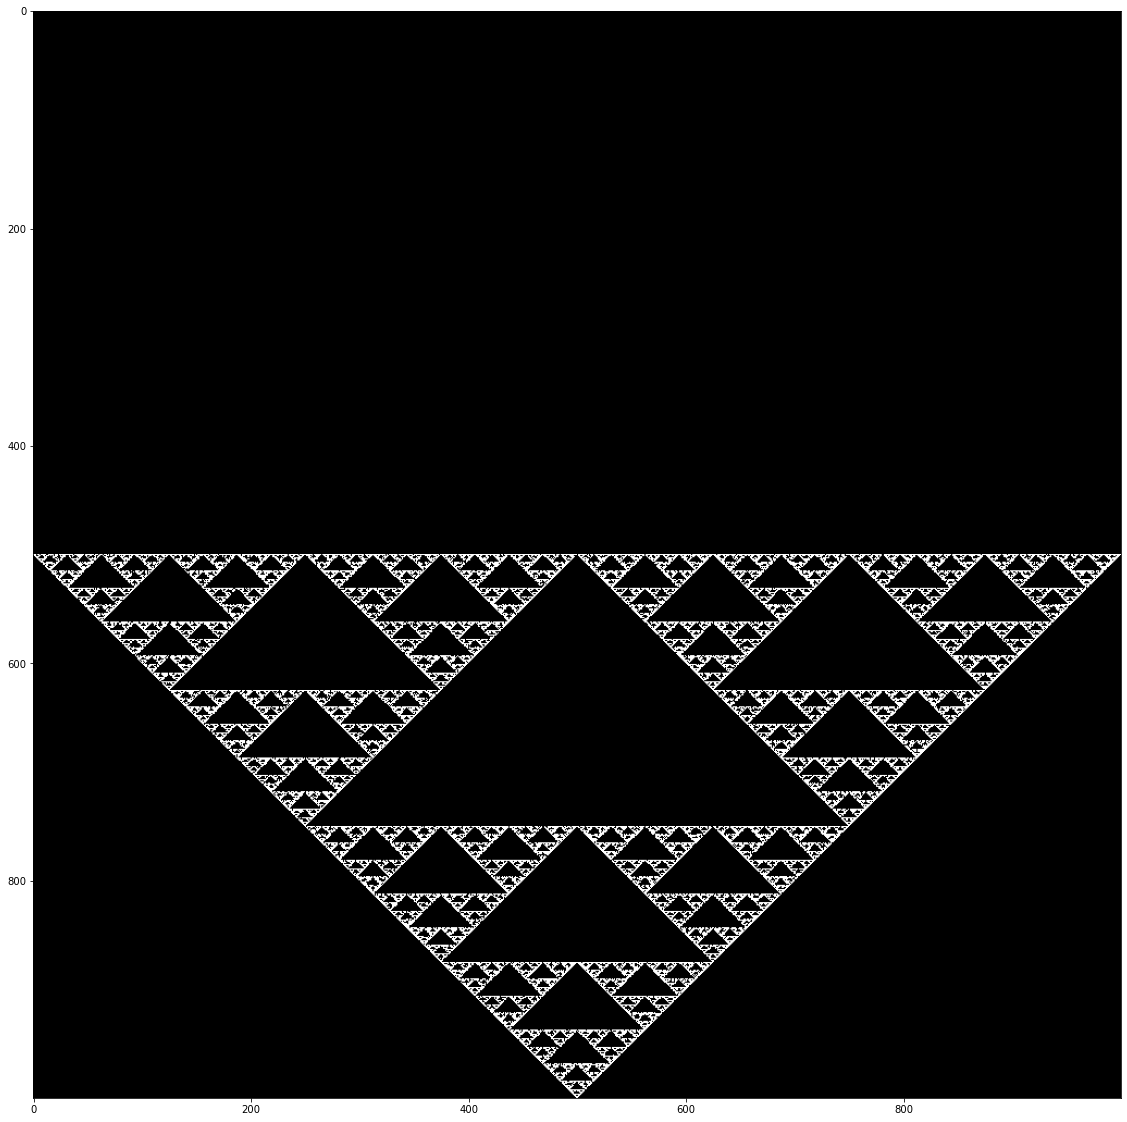

In [13]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
draw = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    zx = (z.real + 1) * 500
    zy = (z.imag + 1) * 500
    if n_iter > 10:
        draw[int(zy)][int(zx)] = 1
plt.figure(figsize=(20, 20))
plt.imshow(draw, cmap='gray')

Experiment with other transformations and try to find another pretty fractal

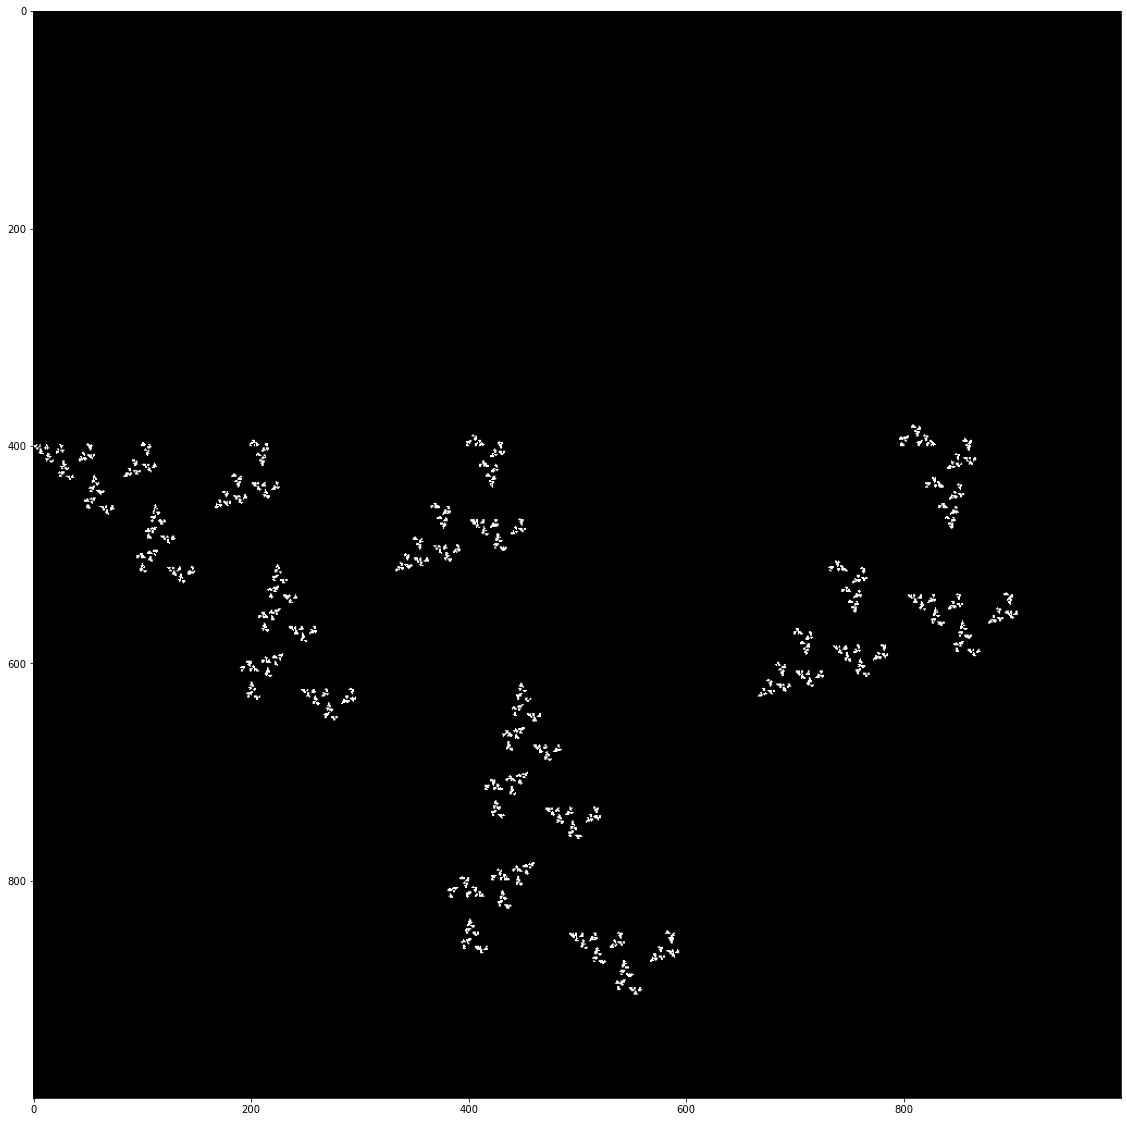

In [19]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=1/3, angle=np.pi/3)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=1/3, angle=-np.pi/3)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
draw = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    zx = (z.real + 1) * 400
    zy = (z.imag + 1) * 400
    if n_iter > 10:
        draw[int(zy)][int(zx)] = 1
plt.figure(figsize=(20, 20))
plt.imshow(draw, cmap='gray')

## Part 5. Functions of matrices

Let $A$ be a square matrix. Sometimes it's necessary to calculate some kind of function of a matrix, e.g. and exponent or a sine. It can be done using series decomposition, but there is another method:

1) Find some annihilating polynomial $f(x)$ for a matrix $A$.

2) Split $f$ into factors $f(x) = (x-\lambda_1)^{k_1}\ldots (x-\lambda_r)^{k_r}$.

3) Let $\phi$ be a smooth function, the value of which at matrix $A$ we'd likr to calculate. Find some polynomial $g_\phi$ with a lower degree then the degree of $f$ with followinf qualities: $g_\phi(\lambda_i)^{(d)} = \phi^{(d)}(\lambda_i)$ for all $0 \leqslant d < k_i$. At all roots of $f$ all the derivatives of $g_\phi$ must match derivatives of $\phi$ up to multiple roots.

4) Then $\phi(A) = g_\phi(A)$.


`A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])`

Calculate
 

1) $B = e^A$.

 

2) $S = \sin A$.

 

3) $\ln (B)$ and check if it is the same as $A$.


In [41]:
#exp(A)
A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])
#minimal polynomial of А f(x) = x^4 - 2x^2 + 1 = (x-1)^2*(x+1)^2
#roots of minimal polynomial are 1 and -1
#the desired polynomial of power not higher than 3, g(x)=ax^3+bx^2+cx+d
#g'(x) = 3ax^2+2bx+c, g''(x)=6ax+2b, g'''(x)=6a
'''
Check values of the polynomial at the roots of the original one,
get a system of linear equations
a + b + c + d = e
3a + 2b + c = e
-a + b - c + d = 1/e
3a - 2b + c = 1/e
matrix of this system (M):
[[1, 1, 1, 1],
 [3, 2, 1, 0],
 [-1, 1, -1, 1],
 [3, -2, 1, 0]]
Mx = [e, e, 1/e, 1/e]
'''
m = np.array([[1, 1, 1, 1], [3, 2, 1, 0],[-1, 1, -1, 1], [3, -2, 1, 0]])
k = np.array([np.e, np.e, 1/np.e, 1/np.e])
a,b,c,d = np.linalg.solve(m, k)
A3 = np.linalg.matrix_power(A, 3)
A2 = np.linalg.matrix_power(A, 2)
A1 = np.linalg.matrix_power(A, 1)
print('exp(A)=')
B = a * A3 + b * A2 + c * A + d * np.eye(4)
print(B)

exp(A)=
[[ -2.12564869   8.29797123  -9.76948899 -13.73453488]
 [ -8.80897641  18.06746022 -17.55645503 -26.2223057 ]
 [  0.96051258   2.49352813  -3.96504589  -5.21180996]
 [ -5.8044431    5.8044431   -3.08616127  -5.8044431 ]]


In [44]:
#sin(A)
A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])
#minimal polynomial of А f(x) = x^4 - 2x^2 + 1 = (x-1)^2*(x+1)^2
#roots of minimal polynomial are 1 and -1
#the desired polynomial of power not higher than 3, g(x)=ax^3+bx^2+cx+d
#g'(x) = 3ax^2+2bx+c, g''(x)=6ax+2b, g'''(x)=6a
'''
Check values of the polynomial at the roots of the original one,
get a system of linear equations
a + b + c + d = sin(1)
3a + 2b + c = cos(1)
-a + b - c + d = sin(-1)
3a - 2b + c = cos(-1)
matrix of the system (M):
[[1, 1, 1, 1],
 [3, 2, 1, 0],
 [-1, 1, -1, 1],
 [3, -2, 1, 0]]
Mx = [sin(1), sin(1), sin(-1), cos(-1)]
'''
m = np.array([[1, 1, 1, 1], [3, 2, 1, 0],[-1, 1, -1, 1], [3, -2, 1, 0]])
k = np.array([np.sin(1), np.cos(1), np.sin(-1), np.cos(-1)])
a,b,c,d = np.linalg.solve(m, k)
A3 = np.linalg.matrix_power(A, 3)
A2 = np.linalg.matrix_power(A, 2)
A1 = np.linalg.matrix_power(A, 1)
print('sin(A)=')
S = a * A3 + b * A2 + c * A + d * np.eye(4)
print(S)

sin(A)=
[[ -4.33142503   5.11086096  -3.90618625  -6.19146557]
 [-10.82405928  11.00115785  -6.66973283 -12.32089609]
 [  1.49683681   0.1240701   -1.98411065  -0.66437241]
 [ -6.66973283   4.98679086  -1.08060461  -4.68562218]]


In [59]:
#log(B)
e1, e2, e3, e4 = np.linalg.eigvals(B)
'''
roots of annihilating polynomial 2.71828197 2.71828168 0.36787938 0.36787951
two multiple roots
the desired polynomial of power not higher than 3, g(x)=ax^3+bx^2+cx+d
g'(x) = 3ax^2+2bx+c, g''(x)=6ax+2b, g(3rd derivative)(x)=6a
'''

'''
Check values of the polynomial at the roots of the original one,
get a system of linear equations
a * e1 ^ 3 + b * e1 ^ 2 + c * e1 + d = ln(e1)
3 * a * e1 ^ 2 + 2 * b * e1 + c = 1/e1
a * e3 ^ 3 + b * e3 ^ 2 + c * e3 + d = ln(e3)
3 * a * e3 ^ 2 + 2 * b * e3 + c = 1/e3
matrix of the system (M):
[[e1^3, e1^2, e1, 1],
 [3 * e1^2, 2 * e1, 1, 0],
 [e3^3, e3^2, e3, 1],
 [3 * e3^2, 2 * e3, 1, 0]]
Mx = [ln(e1), 1/e1, ln(e3), 1/e3]
'''
m = np.array([[np.power(e1,3), np.power(e1,2), e1, 1],
              [3 * np.power(e1,2), 2 * e1, 1, 0],
              [np.power(e3,3), np.power(e3,2), e3, 1],
              [3 * np.power(e3,2), 2 * e3, 1, 0]])
k = np.array([np.log(e1), 1/e1, np.log(e3), 1/e3])
a,b,c,d = np.linalg.solve(m, k)
B3 = np.linalg.matrix_power(B, 3)
B2 = np.linalg.matrix_power(B, 2)
B1 = np.linalg.matrix_power(B, 1)
print('log(B)=')
logB = a * B3 + b * B2 + c * B + d * np.eye(4)
roundedlogB = np.rint(logB)
print(logB)
print('rounded log(B) = ')
print(roundedlogB)

log(B)=
[[ -3.00000028   4.99999967  -4.99999917  -6.99999895]
 [-10.00000099  11.99999967  -8.99999846 -14.99999824]
 [  5.00000052  -2.00000066  -1.99999942   1.00000102]
 [ -9.0000008    7.00000033  -1.99999975  -6.99999997]]
rounded log(B) = 
[[ -3.   5.  -5.  -7.]
 [-10.  12.  -9. -15.]
 [  5.  -2.  -2.   1.]
 [ -9.   7.  -2.  -7.]]


In [53]:
#tanh(A)
A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])
#minimal polynomial of А f(x) = x^4 - 2x^2 + 1 = (x-1)^2*(x+1)^2
#roots of minimal polynomial are 1 and -1
#the desired polynomial of power not higher than 3, g(x)=ax^3+bx^2+cx+d
#g'(x) = 3ax^2+2bx+c, g''(x)=6ax+2b, g'''(x)=6a
'''
Check values of the polynomial at the roots of the original one,
get a system of linear equations
a + b + c + d = tanh(1)
3a + 2b + c = 1/cosh^2(1)
-a + b - c + d = tanh(-1)
3a - 2b + c = 1/cosh^2(-1)
matrix of the system (M):
[[1, 1, 1, 1],
 [3, 2, 1, 0],
 [-1, 1, -1, 1],
 [3, -2, 1, 0]]
Mx = [tanh(1), 1/(cosh(1))^2, tanh(-1), 1/(cosh(-1))^2]
'''
m = np.array([[1, 1, 1, 1], [3, 2, 1, 0],[-1, 1, -1, 1], [3, -2, 1, 0]])
k = np.array([np.tanh(1), 1/((np.cosh(1))**2), np.tanh(-1), 1/((np.cosh(-1))**2)])
a,b,c,d = np.linalg.solve(m, k)
A3 = np.linalg.matrix_power(A, 3)
A2 = np.linalg.matrix_power(A, 2)
A1 = np.linalg.matrix_power(A, 1)
print('tanh(A)=')
T = a * A3 + b * A2 + c * A + d * np.eye(4)
print(T)

tanh(A)=
[[ -4.33450135   4.83283022  -3.46635097  -5.67277891]
 [-10.34890007  10.16398931  -5.82948796 -11.08229252]
 [  0.73339245   0.52653057  -1.86480813  -0.94650492]
 [ -5.82948796   4.30629965  -0.83994868  -3.96467983]]


## Part 6. Gaussian elimination or inverse matrices?

If we need to solve an equation $Ax = B$, there are many methods we can use, among them:
1. Gaussian elimination;
2. Multiplication by inverse matrix: $x = A^{-1}B$.

Try to check which of these methods is faster:
- check the speeds at different matrix sizes: fixed `m = 10` and `n` changing from 10 to 1000; e.g. for `n=10, 50, 100, 200, 500, 1000` (increasing number of variables with a fixed number of the right sides);
- check the speeds for a fixed `n = 100` and `m` changing from 10 to 1000; e.g. for `m = 10, 100, 500, 1000, 2000, 5000, 10000` (increasing number of the right sides with a fixed number of variables).

15.3 µs ± 677 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
28.8 µs ± 197 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
87.4 µs ± 381 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
74.6 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
242 µs ± 6.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
150 µs ± 7.44 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
688 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
461 µs ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.76 ms ± 304 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.64 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
30.4 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
20.3 ms ± 755 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


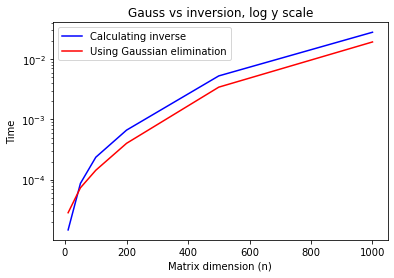

In [93]:
def inverse(A, B):
    i = sla.inv(A)
    return np.dot(i, B)

def gauss(A, B):
    return sla.solve(A, B)

inv_times = []
gauss_times = []
ns = [10, 50, 100, 200, 500, 1000]
m = 10
for n in ns:
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    res_inv = %timeit -o inverse(A, B)
    inv_times.append(res_inv.best)
    res_gauss = %timeit -o gauss(A, B)
    gauss_times.append(res_gauss.best)

plt.semilogy(ns, inv_times, color='blue', label='Calculating inverse')
plt.semilogy(ns, gauss_times, color='red', label='Using Gaussian elimination')
plt.title('Gauss vs inversion, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension (n)')
plt.legend()

249 µs ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
141 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
272 µs ± 4.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
192 µs ± 866 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
374 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
311 µs ± 2.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
513 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
466 µs ± 2.69 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
775 µs ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
911 µs ± 43.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.17 ms ± 45.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.98 ms ± 38.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.9 ms ± 41 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.4 ms ± 64.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

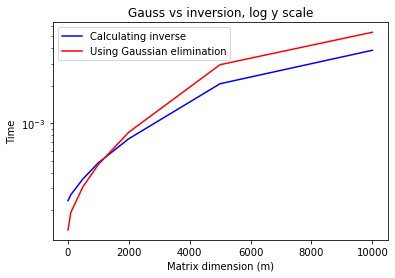

In [97]:
inv_times = []
gauss_times = []
ms = [10, 100, 500, 1000, 2000, 5000, 10000]
n = 100
for m in ms:
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    res_inv = %timeit -o inverse(A, B)
    inv_times.append(res_inv.best)
    res_gauss = %timeit -o gauss(A, B)
    gauss_times.append(res_gauss.best)

plt.semilogy(ms, inv_times, color='blue', label='Calculating inverse')
plt.semilogy(ms, gauss_times, color='red', label='Using Gaussian elimination')
plt.title('Gauss vs inversion, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension (m)')
plt.legend()